# Hydrogen Atomic Orbitals

This document is a Jupyter notebook. If this is the first time you've worked with one, please take a moment to briefly read [these instructions](https://jupyter-notebook.readthedocs.io/en/stable/notebook.html#structure-of-a-notebook-document) explaining how to use it. In particular, make sure you understand the difference between a Markdown cell used for text/images/equations (such as the current one) and a code cell, which executes python code. When you do problem sets in this course, you will be expected to submit Jupyter Notebook files that have a mix of explanatory text and working code.

In this notebook, we will be visualizing the atomic orbitals of the hydrogen atom and learning about code vectorization along the way. Before starting, you should have reviewed the [Week 1 Background](https://kncrabtree.github.io/che155/weeks/1.html). The equation for a hydrogen atomic orbital is

$$ \psi_{n\ell m}(r,\theta,\phi) = \sqrt{ \left( \frac{2}{n} \right)^3 \frac{ (n-\ell-1)! }{2n(n+\ell)!} } e^{-r/2} r^\ell Y_\ell^m(\theta,\phi) L^{2\ell+1}_{n-\ell-1}(r) $$

## Getting started

Let's start by writing a python function that will calculate the value of the wavefunction at a point in space. To do so, the function requires $r$, $\theta$, $\phi$, $n$, $\ell$, and $m$. We also see that we need to evaluate factorials, a generalized Laguerre polynomial $L^{2\ell+1}_{n-\ell-1}(r)$, and a spherical harmonic function $Y_\ell^m(\theta,\phi)$. In your earlier experience with python, you have probably encountered the [math.factorial](https://docs.python.org/3.7/library/math.html#math.factorial) function, but the standard python libraries do not have pre-existing implementations of $L^{2\ell+1}_{n-\ell-1}(r)$ and $Y_\ell^m(\theta,\phi)$. These functions are, however, available in SciPy, so you can save a lot of time using a premade implementation rather than writing your own. In addition, the functions available in SciPy are often based on well-known and studied implementations, and are much more likely to be efficient and bug-free than one you would come up with yourself. Where possible, always try to make use of SciPy and NumPy, as we will do in this course.

You will want to become comfortable reading the [NumPy/SciPy documentation](https://docs.scipy.org/doc/). This is where you will find lists of the functions that are available, explanations of how the functions work, and example code. On the documentation page, you will find links to documentation for different versions of SciPy and NumPy, so you need to select the version you are using. If you're not sure, it is easy to check. Execute the cell below to see what version you are using.

In [1]:
import numpy as np
import scipy as sp

print(f'NumPy version {np.__version__}, SciPy version {sp.__version__}')

NumPy version 1.18.1, SciPy version 1.4.1


The functions we want are in the [`scipy.special` module](https://docs.scipy.org/doc/scipy/reference/tutorial/special.html), which contains [many other useful functions](https://docs.scipy.org/doc/scipy/reference/special.html#module-scipy.special) as well. In particular, we want:

- [`scipy.special.factorial`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.factorial.html#scipy.special.factorial)
- [`scipy.special.sph_harm`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.sph_harm.html#scipy.special.sph_harm)
- [`scipy.special.eval_genlaguerre`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.eval_genlaguerre.html#scipy.special.eval_genlaguerre)

With these in hand, we can write the definition of the hydrogen atomic orbital function. To save a bit of writing, we'll import the `scipy.special` module as `sps` to save some characters.

In [2]:
import scipy.special as sps

def h_orbital(r,theta,phi,n,l,m):
    pf = ( (2./n)**3. * sps.factorial(n-l-1) / (2. * n * sps.factorial(n+l)) )**0.5
    return pf * np.exp(-r/2.) *r**l * sps.sph_harm(m,l,theta,phi) * sps.eval_genlaguerre(n-l-1,2*l+1,r)

## Important: Writing efficient code

At this point you may be wondering why we're using `sps.factorial` instead of `math.factorial`. What we'll soon see is that using the NumPy/SciPy versions of these functions, together with NumPy's [`ndarray` structure](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html) allows for us to write *faster* and *more efficient* code.

To demonstrate this, we'll write some code using standard python data structures, and compare to the same code using a `numpy.ndarray`. We'll evaluate a $2p$ orbital with $m=0$ from 0 to 10 $a_0$ in steps of 0.1 $a_0$, holding $\theta=0$ and $\phi=0$.

In [3]:
out = [] # create list to store output

for i in range(0,101): #loop from 0-100; divide by 10 to get desired value
    out.append(h_orbital(i/10.,0,0,2,1,0))

To do the same thing with an `ndarray`, we will first use the [`numpy.linspace`](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html) function to create an array of $r$ values, and then we will call our `h_orbital` function with that array as the `r` argument. It may seem like this shouldn't work. After all, our function was written to expect a single value of `r`, and now we're giving it an array. However, all of NumPy and SciPy's functions are [universal functions](https://numpy.org/doc/stable/reference/ufuncs.html), and when they see an array as an argument, they *automatically* operate element-by-element on the array. Furthermore, because arrays are of fixed size and shape, the code is [vectorized](https://numpy.org/doc/stable/glossary.html#term-vectorization), and NumPy under the hood calls C-based implementations of loops that are much, much faster than python's `for` loops. This code accomplishes the same thing as before.

In [4]:
r = np.linspace(0,10,101) #create an array of 101 points evenly spaced from 0 to 10 (inclusive)

out2 = h_orbital(r,0,0,2,1,0)

To test the efficiency of the code, we can use the ipython [`%timeit`](https://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-timeit) magic command, which executes a cell over and over for several seconds and computes the average amount of time it takes for the code to complete. To compare the efficiency, we'll just see how long it takes to compute the function, not worrying about capturing the output.

In [5]:
%%timeit

for i in range(0,101): #loop from 0-100; divide by 10 to get desired value
    h_orbital(i/10.,0,0,2,1,0)

3.25 ms ± 88.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [6]:
%%timeit

h_orbital(r,0,0,2,1,0)

45.9 µs ± 886 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


You can see that using the `ndarray` data structure to perform the vectorized computation is about 100 times faster in this test compared to a python `for` loop. Feel free to vary the sizes of the loops and compare! If we had used `math.factorial`, this vectorization would not work, because `math.factorial` is not a universal function. It can only take a single number as an argument, and will raise an error if you give it an array. Compare:

In [50]:
test_x = np.linspace(1,10,10)

print(sps.factorial(test_x))

import math
print(math.factorial(test_x))

[1.0000e+00 2.0000e+00 6.0000e+00 2.4000e+01 1.2000e+02 7.2000e+02
 5.0400e+03 4.0320e+04 3.6288e+05 3.6288e+06]


TypeError: only size-1 arrays can be converted to Python scalars

Vectorization may not seem like such a big deal right now. Both implementations run effectively instantaneously. However, remember that the hydrogen orbitals are 3D functions, so we need to vary $\theta$ and $\phi$ in addition to $r$. Let's do that comparison by calculating 101 values of $\theta$ at each $r$, and 101 values of $\phi$ at each $r$ and $\theta$. The total number of function evaluations is 101x101x101=1030301. First, standard python.

In [7]:
%%timeit

#Standard python -- this will take about 3-4 minutes!

for r in range(0,101):
    for t in range(0,101):
        for p in range(0,101):
            h_orbital(r/10,t*np.pi/100,p*2*np.pi/100,2,1,0)

35.9 s ± 1.1 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


To do the same calculation with NumPy's `ndarray` structures, we can take advantage of [broadcasting](https://numpy.org/doc/stable/user/basics.broadcasting.html). Broadcasting is how NumPy operations automatically loop over arrays. We were using this before to evaluate $\psi$ at all values of $r$ in our 1D array. As explained in the documentation if we have 2 variables that we want to evaluate in a function `func(x,y)`, such as a set of 100 x coordinates and a set of 100 y coordinates, the behavior depends on how we set up the x and y arrays. If both arrays are 1D, that is, their shapes are both `(100,)` then the function is evaluated 100 times. The first time is at `x[0],y[0]`, the second at `x[1],y[1]`, and so on. The output in that case is a 1D array that is the same shape as both input arrays: `(100,)`.

However, if we want to evaluate at every possible combination of `x` and `y`, we we need to make `x` and `y` each 2D arrays with different shapes. We've seen that when the input arrays have the same shape, the output has the same shape as the inputs. When NumPy encounters an operation with differently-shaped arrays, it follows broadcasting rules to make the shapes compatible if possible. Importantly, the broadcasting rules state that when comparing the axis size for arrays, they either must match exactly, or one of them must be size 1. If we set up `x` as a 2D array with 100 entries in the first dimension, and 1 entry in the second dimension, we have a 2D array with shape `(100,1)`. The only difference between this 2D array and our original 1D array is that the 2D array has a second axis of length 1. The data inside the 2D array is the exact same as the 1D array. According to the broadcasting rules, if we set up `y` as a 1x100 array (shape `(1,100)`), when we call `func(x,y)`, the output will be a 100x100 array (shape `(100,100)`). This is because NumPy looks at each axis in the arrays starting from the last axis, and each axis of size 1 is stretched to match the longer axis.

| variable | axis 1 size | axis 2 size |
| --- | --- | --- |
| `x` | 100 | 1 |
| `y` | 1 | 100 |
| `result` | 100 | 100 |

To illustrate this, let's look at a simple example. We'll create 2 arrays: `a` and `b`, each with the numbers 1-5, then show how NumPy uses broadcasting.

In [8]:
def test_function(x,y):
    print(f'{x*y}')
    
a = np.asarray([1,2,3,4,5])
b = np.asarray([1,2,3,4,5])

print(f'a shape: {a.shape}, b shape {b.shape}') #show that a and b are 1D arrays of shape (5,)

test_function(a,b)

a shape: (5,), b shape (5,)
[ 1  4  9 16 25]


In this case, `a` and `b` are each 1D arrays, and so NumPy loops over both arrays *together*, producing another 1D array. NumPy saw that `a` and `b` only contained 1 axis, and the axis sizes matched, so the output has an axis of that same size.

| variable | axis size |
| --- | --- |
| `a` | 5 |
| `b` | 5 |
| `result` | 5 |

If, instead, we want to evaluate the function at every combination of `a` and `b`, we need to input 2D arrays. This is where broadcasting comes in. If one is shaped `(5,1)` and the other `(1,5)`, Numpy will broadcast the two arrays together into a resultant array that has shape `(5,5)`, and contains every combination of the two values. When NumPy operates on the two arrays, it first compares the size of axis 2. It finds that axis is size 1 for `a` and size 5 for `b`, so `a` is stretched over all values of b to make the result have axis 2 size = 5. A similar thing occurs for axis 1.

| variable | axis 1 size | axis 2 size |
| --- | --- | --- |
| `a` | 5 | 1 |
| `b` | 1 | 5 |
| `result` | 5 | 5 |

In [9]:
a2 = a.reshape((5,1))
b2 = b.reshape((1,5))

print(f'a2 shape: {a2.shape}, b2 shape {b2.shape}')

test_function(a2,b2)

a2 shape: (5, 1), b2 shape (1, 5)
[[ 1  2  3  4  5]
 [ 2  4  6  8 10]
 [ 3  6  9 12 15]
 [ 4  8 12 16 20]
 [ 5 10 15 20 25]]


In our case, we want to have a 3D grid of $(r,\theta,\phi)$ coordinates, each with 101 points. If we just create 3 1D arrays, each with 101 points, and call `h_orbital`, the result will just be a 1D array of length 101. The function will not be evaluated at all possible combinations of $r$, $\theta$, and $\phi$.

| variable | axis 1 size | axis 2 size | axis 3 size |
| --- | --- | --- | --- |
| $r$ | 101 | - | - |
| $\theta$ | 101 | - | - |
| $\phi$ | 101 | - | - |
| `result` | 101 | - | - |

Instead, we need to create a set of 3D arrays that cover our grid. Following the broadcasting rules, we can create `rg` with shape `(101,1,1)`, `tg` with shape `(1,101,1)`, and `pg` with shape `(1,1,101)` for $r$, $\theta$, and $\phi$. Then a call to `h_orbital(rg,tg,pg,2,1,0)` will return a 3D array with shape `(101,101,101)`, where the function has been evaluated at each point on the grid.

| variable | axis 1 size | axis 2 size | axis 3 size |
| --- | --- | --- | --- |
| `rg` | 101 | 1 | 1 |
| `tg` | 1 | 101 | 1 |
| `pg` | 1 | 1 | 101 |
| `result` | 101 | 101 | 101 |

The function [`numpy.meshgrid`](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html) can be used to conveniently construct a multidimensional grid like this from 1D arrays, such as the ones made by `numpy.linspace`. This is convenient, as it automatically sets up the dimensions that will work correctly with broadcasting. Read the documentation to understand why `indexing` and `sparse` are used below. You can also change them and see what happens.

In [10]:
t = np.linspace(0,np.pi,101)
p = np.linspace(0,2.*np.pi,101)

print(f'r shape = {r.shape}, t shape = {t.shape}, p shape = {p.shape}')

rg,tg,pg = np.meshgrid(r,t,p,indexing='ij',sparse=True)

print(f'rg shape = {rg.shape}, tg shape = {tg.shape}, pg shape = {pg.shape}')

out3 = h_orbital(rg,tg,pg,2,1,0)

print (f'out3 shape = {out3.shape}, total number of elements: {out3.size}')

r shape = (101,), t shape = (101,), p shape = (101,)
rg shape = (101, 1, 1), tg shape = (1, 101, 1), pg shape = (1, 1, 101)
out3 shape = (101, 101, 101), total number of elements: 1030301


If, instead, we did not use `numpy.meshgrid` and just used `r`, `t`, and `p` directly, the function would only be evaluated at 101 points, not 101x101x101 as we desire.

In [11]:
out4 = h_orbital(r,t,p,2,1,0)

print(f'out4 shape = {out4.shape}, total number of elements: {out4.size}')

out4 shape = (101,), total number of elements: 101


Now with the grids set up, we can do a timing comparison.

In [12]:
%%timeit

h_orbital(rg,tg,pg,2,1,0)

18 ms ± 764 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In my trial this was about 3000 times faster than the python `for` loops! The take-home point of this section is that whenever possible, you should avoid using python's built-in `for` or `while` loops to loop through NumPy arrays. In fact, many other loop applications can also be avoided by clever use of `ndarray` and broadcasting, and in general this approach will be much faster. You can always test the performance of a code snippet with the `%timeit` magic function that we have been using; it's often a good way to identify performance bottlenecks and test ways to improve them.

## Introducing `matplotlib`

For data visualization, [`matplotlib`](https://matplotlib.org/) is one of the most commonly-used python packages, and it is the one we will use in this course. If this is the first time you are using `matplotlib`, take a moment to read through this basic [usage guide](https://matplotlib.org/tutorials/introductory/usage.html), which walks through the very basics of creating simple plots. Below we will begin generating plots, and the focus will mostly be on the hydrogen orbitals and the NumPy details, not on every matplotlib call. The usage guide will provide more explanation of many of the basics, and the API documentation for the [Axes](https://matplotlib.org/api/axes_api.html) and [Figure](https://matplotlib.org/api/_as_gen/matplotlib.figure.Figure.html) objects have many more details and options.

To begin, let's work with $s$ orbitals, which are spherically symmetric. This means that an $s$ orbital has the same value for every $\theta$ and $\phi$, and therefore the wavefunction only depends on $r$. While we could simply use 1D arrays for $r$ and $\psi$, we will still do the calculation in 3D so that our code is flexible. For this calculation, we'll use 1000 $r$ points, and 100 $\theta$ and $\pi$ points.

In [13]:
#Specifying endpoint tells linspace whether to include the end value in the array
r = np.linspace(0,10.,1000,endpoint=False)
t = np.linspace(0,np.pi,100,endpoint=True)
p = np.linspace(0,2*np.pi,100,endpoint=False)

rg, tg, pg = np.meshgrid(r,t,p,indexing='ij',sparse=True)

psi_1s = h_orbital(rg,tg,pg,1,0,0)

print(f'psi_1s shape: {psi_1s.shape}')

psi_1s shape: (1000, 100, 100)


As you read the `matplotlib` documentation, you will see that it references the "pyplot API" and the "object-oriented API." While both are perfectly valid, we will use the object-oriented API here. This is mostly to prevent errors that may happen when you use a notebook environment and execute cells in different orders. First we need to import the library and create a new set of `Figure` and `Axes` objects. The `Figure` is like the container for one or more plots, and the unfortunately-named `Axes` object (not to be confused with an `Axis` object!) is one of the plots. We can create the `Figure` and `Axes` with another unfortunately-named command: [`pyplot.subplots`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html?highlight=subplots#matplotlib.pyplot.subplots). Although that function can create a figure with multiple subplots, when called without arguments, it actualy produces a figure with only one plot, which is what we want in this case.

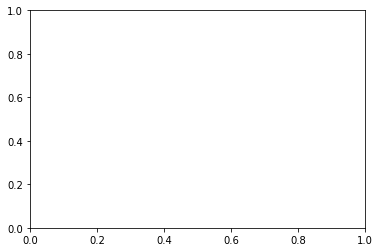

In [14]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

We'll start by making a 1D visualization of the $1s$ orbital as a function of $r$ at a single value of $\theta$ and $\phi$. To do this, we will take [slices](https://numpy.org/doc/stable/reference/arrays.indexing.html#basic-slicing-and-indexing) of the `psi_1s` array. We're also using the [`np.real`](https://numpy.org/doc/stable/reference/generated/numpy.real.html) function to take only the real part of the wavefunction. The $1s$ orbital is entirely real anyways, so this does not discard any information; later we will deal with other wavefunctions that are complex.

To make a graph of a 1D function, we can use [`Axes.plot`](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.plot.html), which by default produces a line graph for xy data. `Axes.plot` can take either 1 or 2 arrays as arguments. If only 1 array is present, then it is interpreted as the y data for the plot, and the x values will be the point number in the array (0, 1, 2, 3, ...). If 2 arrays are present, then they must be the same size, and the first array contains the x values and the second array contains the corresponding y values. Here we take our 1D slice of `psi_1s` at $\theta=0$, $\phi=0$, and plot it against a 1D slice of `rg`. In the call to `Axes.plot`, we start with the x data, then the y data, and then we can specify additional arguments that customize the appearance of the curve. More details on the options that are available are in the documentation link above; here we'll just add a label that will later show up in a plot legend.

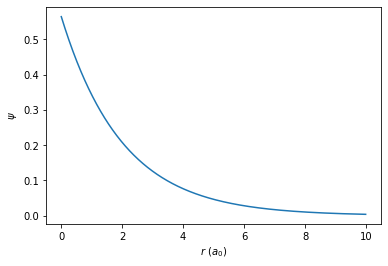

In [15]:
ax.cla() #clear the axes object in case things have already been plotted on it
ax.plot(rg[:,0,0],np.real(psi_1s[:,0,0]),label='$\psi_{1s}$')
ax.set_xlabel('$r$ ($a_0$)')
ax.set_ylabel('$\psi$')
fig #Since the figure was already plotted above, we need to tell iPython to show it again with the updated info

A plot can have more than one curve on it. Here we'll calculate the $2s$ orbital, plot it, and add a legend.

In [16]:
psi_2s = h_orbital(rg,tg,pg,2,0,0)

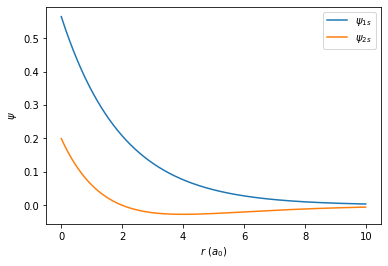

In [17]:
ax.plot(rg[:,0,0],np.real(psi_2s[:,0,0]),label='$\psi_{2s}$')
ax.legend()
fig

To better see the node structure, we can add a dashed horizontal black line.

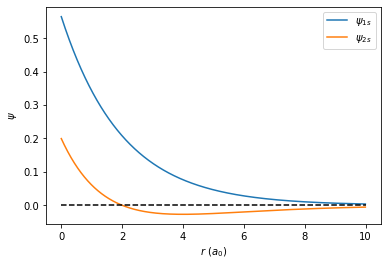

In [18]:
ax.plot([0,10],[0,0],'k--')
fig

Or, perhaps better in this case, we can change the way the [axis spines](https://matplotlib.org/api/spines_api.html) are set up. The `matplotlib` documentation has many examples that demonstrate its capabilities in a more user-friendly way than the API documentation directly. [This example](https://matplotlib.org/examples/pylab_examples/spine_placement_demo.html) shows an overview of some ways that axis spine positioning works. Let's create another figure for comparison. Because later we're going to add a second subplot to the figure, this time we'll create the figure with [`pyplot.figure`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.figure.html), telling it to make a figure that is 8 inches wide by 4 inches tall, then call [`Figure.add_subplot`](https://matplotlib.org/api/_as_gen/matplotlib.figure.Figure.html#matplotlib.figure.Figure.add_subplot) with the argument `1,2,1` to say that the `Axes` object will be part of a figure with 1 row of plots, 2 columns of plots, and this plot is at position 1.

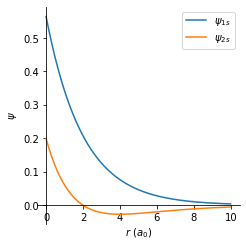

In [55]:
fig2 = plt.figure(figsize=(8,4))
ax2 = fig2.add_subplot(1,2,1)
ax2.plot(rg[:,0,0],np.real(psi_1s[:,0,0]),label='$\psi_{1s}$')
ax2.plot(rg[:,0,0],np.real(psi_2s[:,0,0]),label='$\psi_{2s}$')
ax2.set_xlabel('$r$ ($a_0$)')
ax2.set_ylabel('$\psi$')

ax2.spines['left'].set_position('zero')
ax2.spines['right'].set_color('none')
ax2.spines['bottom'].set_position('zero')
ax2.spines['top'].set_color('none')
ax2.xaxis.set_ticks_position('bottom')
ax2.yaxis.set_ticks_position('left')
ax2.legend()

There are many, many ways to customize the appearance of plots, annotate them with additional information, or make them more sophisticated. It's impossible in this class to do any more than scratch the surface. Be sure to check out the [matplotlib gallery](https://matplotlib.org/gallery.html) to see on overview of the kinds of things that are possible. Each example has source code available that you can draw from as you make your own plots. We will take a look at other plotting styles and plot types as we go forward, but you should always go back to the gallery as you learn more!

Just like in ordinary python, you can put expressions into the call to `Axes.plot`. Here we'll plot the squares of the wavefunctions. Recall that for a complex number $z = a + bi$, its square is $z^*z$, where $z^*$ is the complex conjugate of $z$: $z^* = a - bi$. The square is therefore real

$$ z^*z = (a - bi)(a + bi) = a^2 + b^2 $$

however, when Numpy operates on an array of complex numbers, the output is also an array of complex numbers, even if the imaginary part is 0. We'll calculate the square, then take the real part since the imaginary part is zero anyways mathematically.

We'll add a subplot to `fig2` with the square using [`Figure.add_subplot`](https://matplotlib.org/api/_as_gen/matplotlib.figure.Figure.html#matplotlib.figure.Figure.add_subplot), and add a grid for the fun of it.

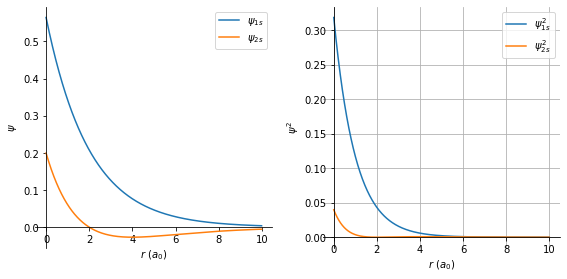

In [56]:
ax3 = fig2.add_subplot(1,2,2)

ax3.plot(rg[:,0,0],np.real(np.conj(psi_1s[:,0,0])*psi_1s[:,0,0]),label='$\psi_{1s}^2$')
ax3.plot(rg[:,0,0],np.real(np.conj(psi_2s[:,0,0])*psi_2s[:,0,0]),label='$\psi_{2s}^2$')
ax3.set_xlabel('$r$ ($a_0$)')
ax3.set_ylabel('$\psi^2$')

ax3.spines['left'].set_position('zero')
ax3.spines['right'].set_color('none')
ax3.spines['bottom'].set_position('zero')
ax3.spines['top'].set_color('none')
ax3.xaxis.set_ticks_position('bottom')
ax3.yaxis.set_ticks_position('left')
ax3.grid()
ax3.legend()

fig2.tight_layout() #recalculates subplot sizes to try and prevent labels from overlapping
fig2

Sometimes, it's useful to manually adjust the plot ranges. On the right subplot, it's hard to make out the node in the $2s$ orbital. We can zoom in with [`Axes.set_ylim`](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.set_ylim.html) (there is an equivalent [`Axes.set_xlim`](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.set_xlim.html) for the x axis as well).

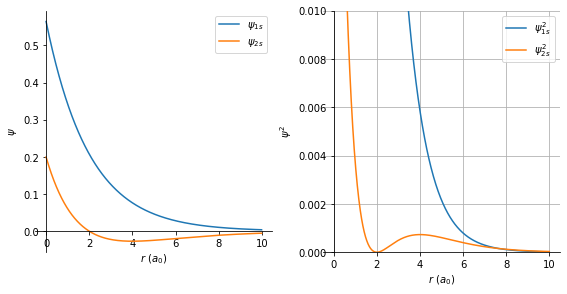

In [57]:
ax3.set_ylim(0,0.01)
fig2

## 2D plotting with `matplotlib`

Although we have only made a minimal exploration of the possible 1D plots that `matplotlib` can make (we'll look at more as we go along-- don't worry!), it is also capable of 2D and 3D plotting as well. If we want to make a 2D visualization, we can use [`Axes.pcolormesh`](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.pcolormesh.html#matplotlib.axes.Axes.pcolormesh), which creates a false color plot. Its main function signature is `pcolormesh([X,Y],C)`, where the square brackets indicate that `X` and `Y` are optional. `X` is an array of the x values, `Y` is an array of the y values, and `C` is the 2D array of data to be plotted (this is an oversimplification; please read the documentation for more technical details. In particular, the way we're using this drops the last row and column of our data because of the way the mesh is defined).

Below, we'll plot the 1s orbital on 2 false color plots: the one on the left shows the magnitude of the complex number ($|z| = \sqrt{a^2 + b^2}$) using [`numpy.absolute`](https://numpy.org/doc/stable/reference/generated/numpy.absolute.html) and the one on the right shows the phase $\phi(z) = \arctan b/a, \phi(z) \in [0,2\pi)$ using [`numpy.angle`](https://numpy.org/doc/stable/reference/generated/numpy.angle.html). Also, since we're plotting angle data, we can tell `matplotlib` to make a polar plot with `projection='polar'` when we create the `Axes` object. (Note, try removing `projection='polar'`! The plots will be square instead.)

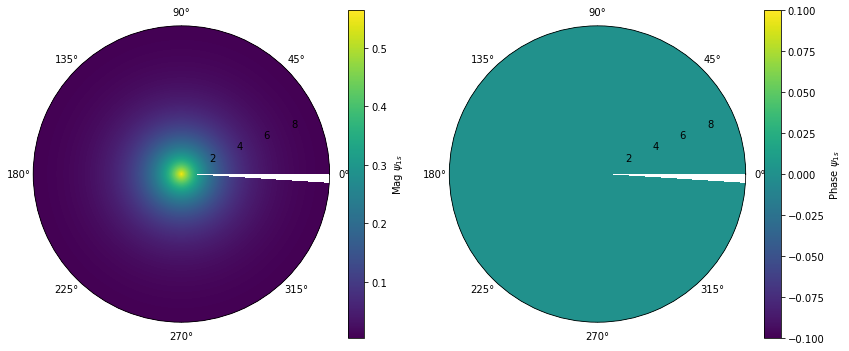

In [104]:
fig3 = plt.figure(figsize=(12,5))
ax4 = fig3.add_subplot(1,2,1,projection='polar')
# pcolormesh(X,Y,C) treats the first index of C as the row number (corresponding to Y)
# and the second as the column number (corresponding to X)
# Here I want r on the x axis and phi on the y axis, so I plot the transpose (.T) of the psi_1s[:,:,0] slice
mesh = ax4.pcolormesh(pg[0,0,:],rg[:,0,0],np.absolute(psi_1s[:,0,:]))
cbar = fig3.colorbar(mesh) # Add a colorbar
cbar.set_label("Mag $\psi_{1s}$")


ax5 = fig3.add_subplot(1,2,2,projection='polar')
mesh2 = ax5.pcolormesh(pg[0,0,:],rg[:,0,0],np.angle(psi_1s[:,0,:]))
cbar2 = fig3.colorbar(mesh2,ax=ax5) # Add a colorbar
cbar2.set_label("Phase $\psi_{1s}$")

fig3.tight_layout()

You'll note that there is a little slice missing. This is because, according to the definition of `pcolormesh`, the `X` and `Y` grids need to have 1 more point than the actual data, since they define the corners of the rectangular pixels in a square grid. To fix that, we just need to add one more point to the end of the `rg` and `pg` grids.

When you find yourself wrting the same code over and over, it's usually a good idea to put it into a function.

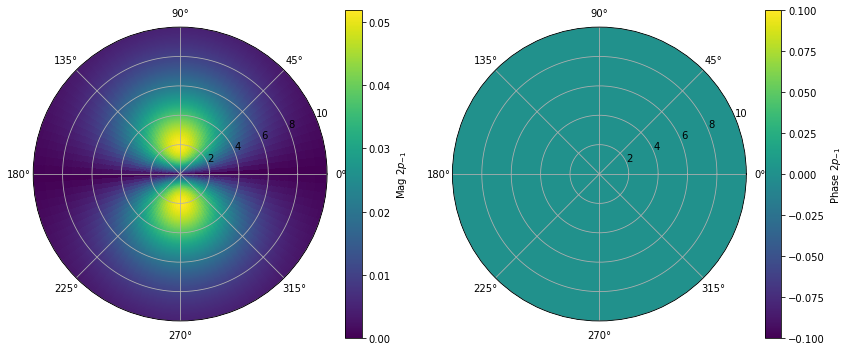

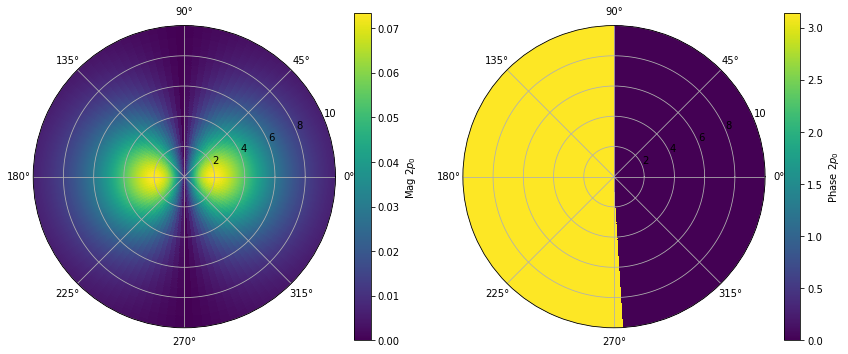

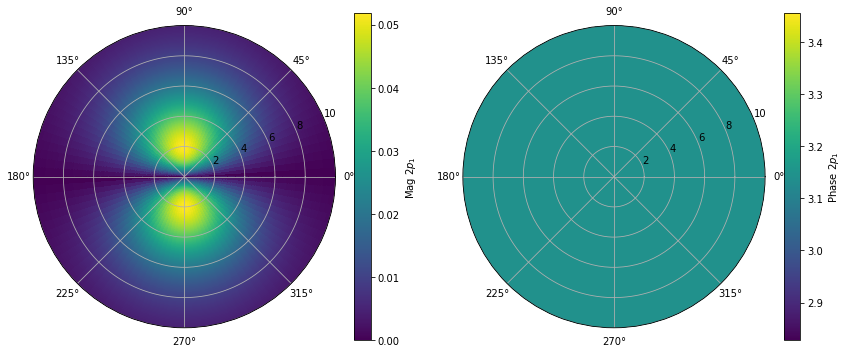

In [113]:
def r_phi_plot(r,phi,psi,label):
    fig = plt.figure(figsize=(12,5))
    ax = fig.add_subplot(1,2,1,projection='polar')

    mesh = ax.pcolormesh(phi,r,np.absolute(psi))
    cbar = fig.colorbar(mesh) 
    cbar.set_label("Mag "+label)
    ax.grid()

    ax2 = fig.add_subplot(1,2,2,projection='polar')
    mesh2 = ax2.pcolormesh(phi,r,np.angle(psi))
    cbar2 = fig3.colorbar(mesh2,ax=ax2)
    cbar2.set_label("Phase "+label)
    ax2.grid()
    
    fig.tight_layout()
    return fig

r_plot = np.linspace(0,10.,1001,endpoint=True)
p_plot = np.linspace(0,2*np.pi,101,endpoint=True)

rg_plot, tg_plot, pg_plot = np.meshgrid(r_plot,t,p_plot,indexing='ij',sparse=True)

p_orb_figs = []
for m in [-1,0,1]:
    psi = h_orbital(rg,tg,pg,2,1,m)
    label = f"$2p_{{{m}}}$"
    p_orb_figs.append(r_phi_plot(rg_plot[:,0,0],pg_plot[0,0,:],psi[:,0,:],label))

We can also modify this code to take different slices of $\theta$, as the code below demonstrates. Feel free to change theta_index.

theta = 0.3807991095260356 rad; 21.81818181818182 deg


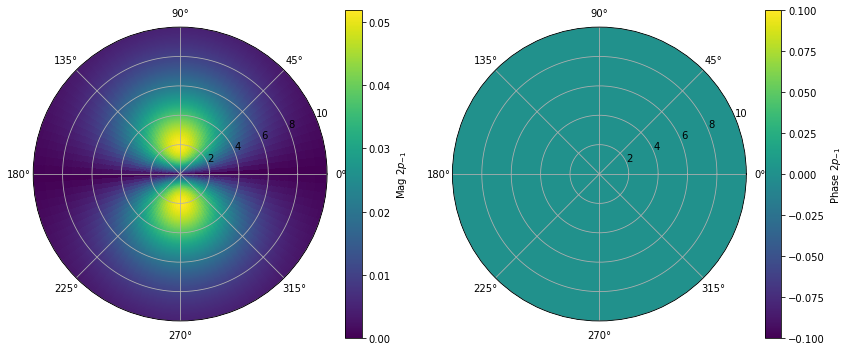

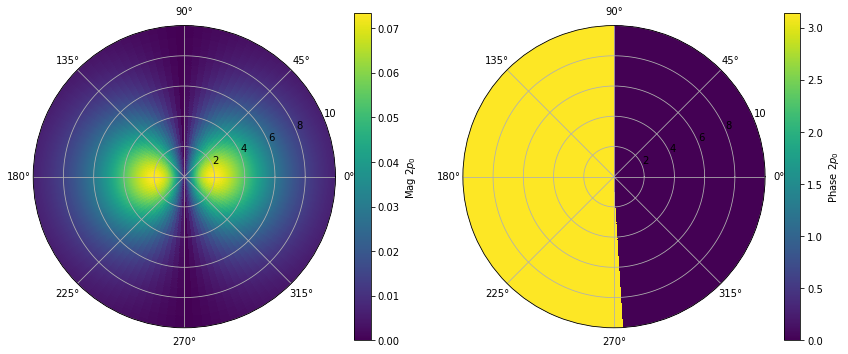

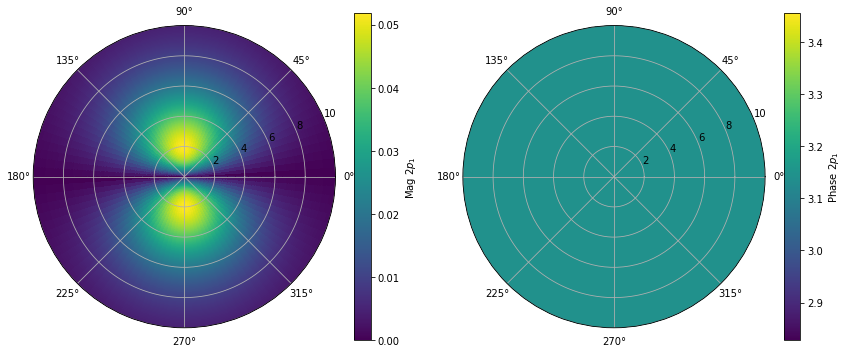

In [114]:
p_orb_figs = []
theta_index = 12
print(f"theta = {tg[0,theta_index,0]} rad; {tg[0,theta_index,0]*180./np.pi} deg")
for m in [-1,0,1]:
    psi = h_orbital(rg,tg,pg,2,1,m)
    label = f"$2p_{{{m}}}$"
    p_orb_figs.append(r_phi_plot(rg_plot[:,0,0],pg_plot[0,0,:],psi[:,0,:],label))

theta = 0.3807991095260356 rad; 21.81818181818182 deg


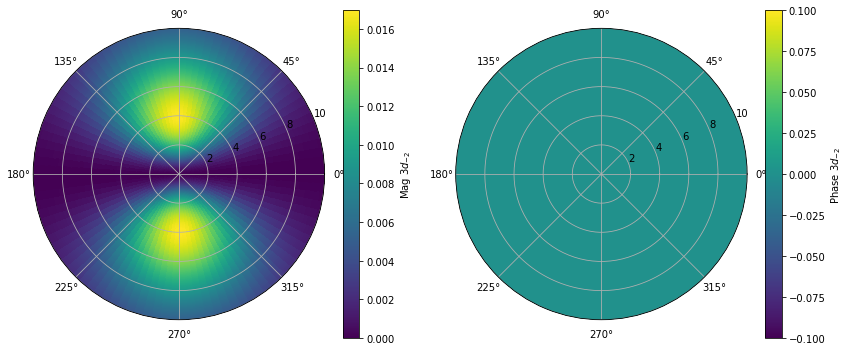

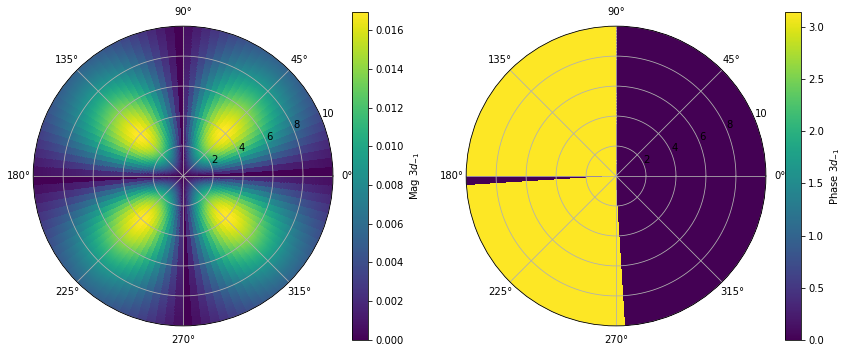

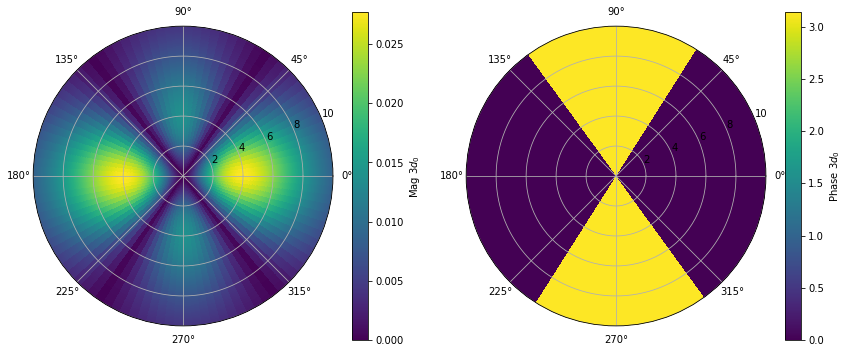

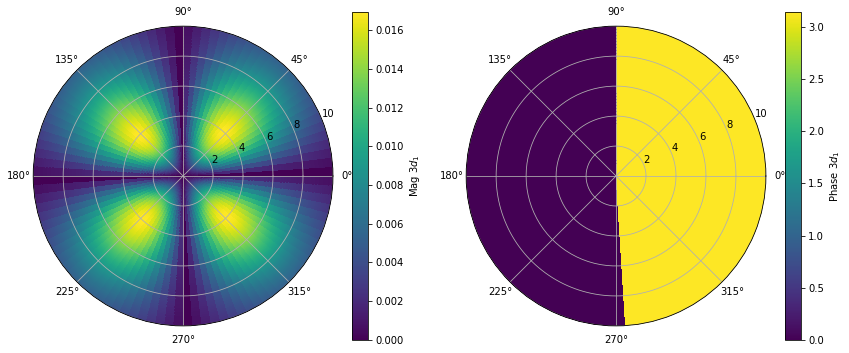

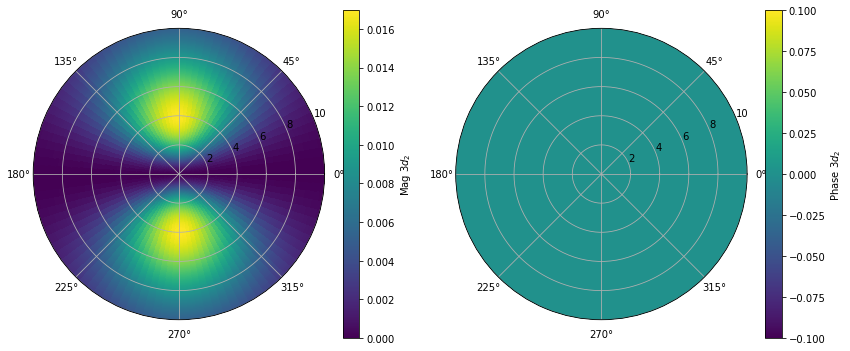

In [115]:
d_orb_figs=[]
theta_index = 12
print(f"theta = {tg[0,theta_index,0]} rad; {tg[0,theta_index,0]*180./np.pi} deg")
for m in [-2,-1,0,1,2]:
    psi = h_orbital(rg,tg,pg,3,2,m)
    label = f"$3d_{{{m}}}$"
    d_orb_figs.append(r_phi_plot(rg_plot[:,0,0],pg_plot[0,0,:],psi[:,0,:],label))

## Pitfalls of numerical computing

Even in these simple examples, you can start to see some of the intersting artifacts that appear with numerical computing. You may have noticed the extra wedges of color that appear in somthe phase plots. These arise because when the angle data are plotted, the data are spread out on a grid with spacing $\Delta\phi$. For a given value of $\phi_i$, the color corresponding to that point is plotted over the range $\left[\phi_i,\phi_i+\Delta\phi\right)$. When a node occurs in the wavefunction, its value is $0 + 0i$, and there is a phase ambiguity because a complex number of magnitude zero has no meaningful phase. NumPy tries to resolve this by setting the phase to 0 if the imaginary part of the complex number is 0. However, the number 0 is problematic in scientific computing. 

You may know that computers store numbers in bits which can only have a value of 0 or 1. When storing integers, it is easy to represent them in binary. If we have an 8-bit number, then we can represent unsigned (postitive) integers like follows:

| number | 8-bit unsigned binary |
| --- | --- |
| 0 | `00000000` |
| 1 | `00000001` |
| 2 | `00000010` |
| 3 | `00000011` |
| 4 | `00000100` |
| 5 | `00000101` |
| 6 | `00000110` |
| 7 | `00000111` |
| 8 | `00001000` |
| ... | ... |
| 255 | `11111111` |

To learn more, take a moment to read the wikipedia article on [Two's Complement](https://en.wikipedia.org/wiki/Two%27s_complement) integers. The article describes how positive and negative integers are represented on computers in more detail. In many programming languages, the CPU architecture sets a limit on the maximum possible integer and minimum possible integer; on a 64 bit system, for example, there are 64 bits available: 63 magnitude bits and 1 sign bit. So for a signed integer, the min and max are -2^63 and 2^63-1: `[-9223372036854775808,9223372036854775807]`. As of Python3; however, their implementation of integers has no limit, because it can dynamically use more bits as needed.

Non-integers are called floating point numbers, and they are represented on computers using the [IEEE 754 standard](https://en.wikipedia.org/wiki/Floating-point_arithmetic#IEEE_754:_floating_point_in_modern_computers). The details are very technical and we can't get into all of them, but the gist is that when representing floating point numbers and carrying out operations, there is always rounding error. It is often the case that after a series of operations that *mathematically* yield 0, the same set of numerical calculations on a computer may return a very small number that is close to, but not exactly 0. This is why the behavior near a node is unpredictable: tiny rounding errors in the calculation may result in the computed phase flipping by 180 degrees (i.e., change in sign). For much, much more detail on this, there is a famous article online called [What every computer scientist should know about floating point arithmetic](https://docs.oracle.com/cd/E19957-01/806-3568/ncg_goldberg.html), which is essentially required reading for anyone who will be writing code that does serious calculations.

Two very important takeaways from this (demonstrated below):

- **Never** test whether two floating point numbers are equal to each other, such as `if a == b` when `a` and `b` are both floating-point.
- **Never** test whether a floating point number is equal to 0.

One simple way to do this is using [`numpy.absolute`](https://numpy.org/doc/stable/reference/generated/numpy.absolute.html): `if numpy.absolute(a-b) < epsilon` or `if numpy.absolute(a) < epsilon` where `epsilon` is a small number that corresponds to the maximum permissible rounding error in your application. For 64-bit floating point numbers, the smallest possible value of epsilon is `2.220446049250313e-16`. This information is available in the `sys` module as `sys.float_info`. Alternatively, you can use the [`numpy.isclose`](https://numpy.org/doc/stable/reference/generated/numpy.isclose.html) function, which does a similar comparison but also uses a relative tolerance in addition to an abolute tolerance.


In [145]:
import sys
print(str(sys.float_info)+"\n")


num = np.cos(np.pi/3)
print(f'cos(pi/3) = {num}')
print(f'cos(pi/3) == 0.5: {num == 0.5}')
print(f'cos(pi/3) is close to 0.5: {np.isclose(num,num2)}')

sys.float_info(max=1.7976931348623157e+308, max_exp=1024, max_10_exp=308, min=2.2250738585072014e-308, min_exp=-1021, min_10_exp=-307, dig=15, mant_dig=53, epsilon=2.220446049250313e-16, radix=2, rounds=1)

cos(pi/3) = 0.5000000000000001
cos(pi/3) == 0.5: False
cos(pi/3) is close to 0.5: True
